In [1]:
import pandas as pd 
import numpy as np
from entropy_pooling import views
from entropy_pooling import entropy_minimizer
from entropy_pooling import markoviz_optimizer

In [2]:
data_raw = pd.read_excel("data/data.xlsx").dropna(axis=1, how='all')
weights = data_raw[["Weight"]]
scenarios = data_raw.drop(columns = ["Weight"])

In [3]:
(A,b,C,d) = views.load_debug();

     pcost       dcost       gap    pres   dres
 0: -1.9348e+00 -1.9350e+00  2e-04  0e+00  7e-01
 1: -1.9348e+00 -1.9348e+00  2e-06  1e-19  7e-03
 2: -1.9348e+00 -1.9348e+00  2e-08  1e-19  2e-04
 3: -1.9348e+00 -1.9348e+00  5e-10  1e-19  1e-05
 4: -1.9348e+00 -1.9348e+00  6e-12  1e-19  8e-08
Optimal solution found.


In [4]:
c = 0.5
p = np.array(weights)
m,n = p.shape

posterior = entropy_minimizer.full_confidence_posterior(p, A,b,C,d)
weighted_posterior = entropy_minimizer.confidence_weighted_posterior(p, posterior, c)

In [5]:
deltas, asset_names = markoviz_optimizer.load_asset_deltas("data/deltas.xlsx")

asset_scenarios = markoviz_optimizer.asset_scenarios(scenarios, deltas, asset_names)
asset_scenarios.head()

,Kesko,UPM,Fortum,Apple
0,3.742077,4.989436,7.592619,4.983188
1,-1.743102,-2.324136,-3.536729,1.468509
2,3.222797,4.297062,6.539008,8.579736
3,-2.270124,-3.026832,-4.606048,-3.290835
4,1.501175,2.001567,3.045863,4.251661


In [6]:

loaded_constraints = pd.read_excel("Data/sample_portfolio1_constrs.xlsx")
manual_constraints = (loaded_constraints.iloc[:,:-2],
                      loaded_constraints.iloc[:,-2],
                      loaded_constraints.iloc[:,-1])

total = 417000000

The optimization was succesful: False
The optimization was terminated due to: 
Singular matrix E in LSQ subproblem
Kesko: 25.0%
UPM: 25.0%
Fortum: 25.0%
Apple: 25.0%


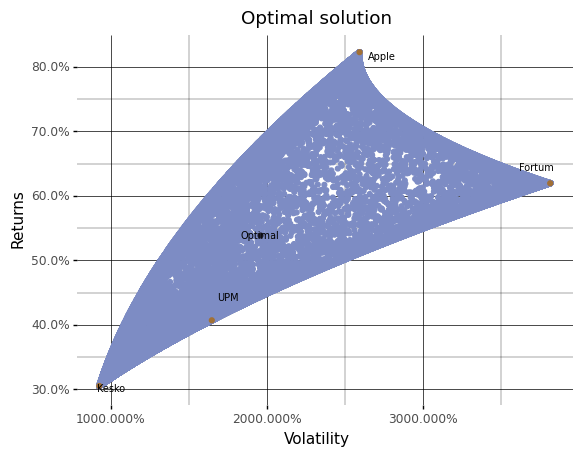

In [7]:
#Optimization using prior weights
optimal_x = markoviz_optimizer.optimizer(asset_scenarios,
                                         weights,
                                         mu_0 = 0.01*total,
                                         manual_constraints = manual_constraints,
                                         visualize = True,
                                         verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}%".format(col, np.round(optimal_x[i]*100,decimals = 1)))

The optimization was succesful: False
The optimization was terminated due to: 
Singular matrix E in LSQ subproblem
Kesko: 25.0% 
UPM: 25.0% 
Fortum: 25.0% 
Apple: 25.0% 


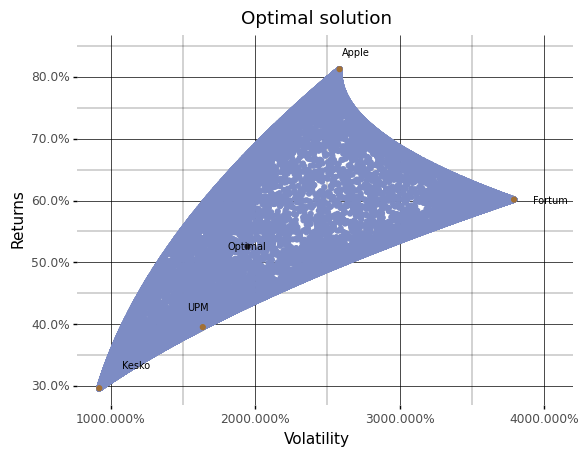

In [10]:
#Optimization using posterior weights
optimal_x = markoviz_optimizer.optimizer(asset_scenarios,
                                         weighted_posterior,
                                         mu_0 = 0.01*total,
                                         manual_constraints = manual_constraints,
                                         visualize = True,
                                         verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}% ".format(col, np.round(optimal_x[i]*100,decimals = 1)))